In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



from PIL import Image
import numpy as np
import PIL.ImageOps

In [2]:
class ConvNet(nn.Module):
    
    def __init__(self):
        
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1,16,3,1)
        self.cn2 = nn.Conv2d(16,32,3,1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608,64)
        self.fc2 = nn.Linear(64,10)
        
    def forward(self,x):
        x = self.cn1(x) # Size changes from (28,28,1) to (26,26,16)
        x = F.relu(x)
        x = self.cn2(x) #Size changes from (26,26,16) to (24,24,32)
        x = F.relu(x)
        x = F.max_pool2d(x,2) #Size changes from (24,24,32) to (12,12,32)
        x = self.dp1(x)
        x = torch.flatten(x,1) #Size flattened to (12*12*32 -->> 4608)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim = 1)
        return op
        

In [3]:
training = datasets.MNIST("", train = True, download = True, 
                          transform = transforms.Compose([transforms.ToTensor()]))
testing = datasets.MNIST("", train = False, download = True,
                        transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
train_dataloader = torch.utils.data.DataLoader(training, batch_size = 10, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(testing, batch_size = 10, shuffle = True)

In [5]:
model = ConvNet()
learn_rate = optim.Adadelta(model.parameters(), lr = 0.5)
epochs = 4

In [6]:
#Training the network for 4 epochs
for i in range(epochs):
    for data in train_dataloader:
        image, output = data
        model.zero_grad()
        result = model(image)
        loss = F.nll_loss(result, output)
        loss.backward()
        learn_rate.step()
    print(loss)

tensor(0.3792, grad_fn=<NllLossBackward>)
tensor(0.0131, grad_fn=<NllLossBackward>)
tensor(0.0026, grad_fn=<NllLossBackward>)
tensor(0.3897, grad_fn=<NllLossBackward>)


In [7]:
model.eval() 

ConvNet(
  (cn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (cn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dp1): Dropout2d(p=0.1, inplace=False)
  (dp2): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=4608, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data2 in test_dataloader:
        image2, output2 = data2
        result2 = model(image2)
        for index, tensor_value in enumerate(result2):
            total += 1
            if torch.argmax(tensor_value) == output2[index]:
                correct += 1
                
accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.9875


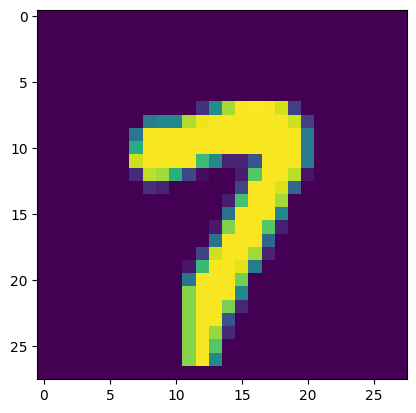

In [32]:
plt.imshow(image[9].view(28,28))
plt.show()

In [33]:
print(torch.argmax(model(image)[9]))

tensor(7)
